In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("C:/Users/vedant kathe/Downloads/DMC_2019_task/DMC_2019_task/train.csv",sep='|')

In [3]:
df.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0


In [4]:
df.shape

(1879, 10)

In [5]:
df.fraud.value_counts()

0    1775
1     104
Name: fraud, dtype: int64

In [6]:
df.trustLevel.value_counts()

2    347
1    332
3    318
5    302
6    291
4    289
Name: trustLevel, dtype: int64

In [7]:
df.isna().sum()

trustLevel                   0
totalScanTimeInSeconds       0
grandTotal                   0
lineItemVoids                0
scansWithoutRegistration     0
quantityModifications        0
scannedLineItemsPerSecond    0
valuePerSecond               0
lineItemVoidsPerPosition     0
fraud                        0
dtype: int64

C:\Users\vedant kathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='scannedLineItemsPerSecond'>

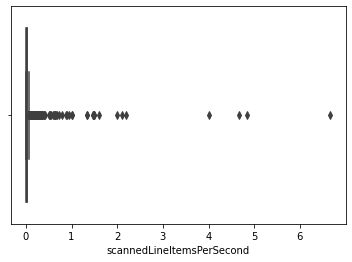

In [8]:
sns.boxplot(df['scannedLineItemsPerSecond'])

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
X=df.drop('fraud',axis=1)
y=df['fraud']
sc=StandardScaler()
X=sc.fit_transform(X)

In [11]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
model=logit.fit(X,y)

In [12]:
df_test=pd.read_csv("C:/Users/vedant kathe/Downloads/DMC_2019_task/DMC_2019_task/test.csv",sep='|')

In [13]:
df_test.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,4,467,88.48,4,8,4,0.014989,0.189465,0.571429
1,3,1004,58.99,7,6,1,0.026892,0.058755,0.259259
2,1,162,14.00,4,5,4,0.006173,0.086420,4.000000
3,5,532,84.79,9,3,4,0.026316,0.159380,0.642857
4,5,890,42.16,4,0,0,0.021348,0.047371,0.210526


In [14]:
X_test=df_test


In [15]:
scaler=StandardScaler()
X_test=scaler.fit_transform(X_test)

In [16]:
df_result=pd.read_csv("C:/Users/vedant kathe/Downloads/sol_dmc.csv")
df_result.head()

,fraud
0,0
1,0
2,0
3,0
4,0


In [17]:
df_test.shape

(498121, 9)

In [18]:
df_result.shape

(498121, 1)

In [19]:
y_test=df_result

In [20]:
y_pred = model.predict(X_test)

In [21]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.97


In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix11 = confusion_matrix(y_test, y_pred)
print(confusion_matrix11)

[[469270   5124]
 [ 11839  11888]]


In [23]:
y_test.value_counts()

fraud
0        474394
1         23727
dtype: int64

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
def upsample_SMOTE(X, y, ratio=0.08):
    sm = SMOTE(random_state=23, sampling_strategy=ratio)
    X_train_sm, y_train_sm = sm.fit_resample(X, y)
    print(len(X_train_sm), len(y_train_sm))
    return X_train_sm, y_train_sm

In [26]:
X_train_sm,y_train_sm=upsample_SMOTE(X, y, ratio=0.09)

1934 1934


In [27]:
X_train_sm=pd.DataFrame(X_train_sm)
y_train_sm=pd.DataFrame(y_train_sm)

In [28]:
logit=LogisticRegression()
model_new=logit.fit(X_train_sm,y_train_sm)
y_pred1 = model_new.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model_new.score(X_test, y_test)))

C:\Users\vedant kathe\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of logistic regression classifier on test set: 0.96


In [29]:
ensembling=pd.DataFrame()
ensembling['logistic_pred']=y_pred1

In [30]:
ensembling.head()

,logistic_pred
0,0
1,0
2,0
3,0
4,0


In [31]:
y_pred=pd.DataFrame()
y_pred['fraud']=y_pred1

In [32]:
y_pred.value_counts()

fraud
0        471891
1         26230
dtype: int64

In [33]:
y_test.value_counts()

fraud
0        474394
1         23727
dtype: int64

In [34]:
confusion_matrix1 = confusion_matrix(y_test, y_pred)
print(confusion_matrix1)

[[463655  10739]
 [  8236  15491]]


In [35]:
import tensorflow as tf
from tensorflow import keras

In [36]:
keras.backend.clear_session()

In [37]:
X_train_sm.shape

(1934, 9)

In [38]:
tf.random.set_seed(1234)

In [39]:
classifier1 = keras.models.Sequential()
classifier1.add(keras.layers.Dense(8, activation = 'relu', input_dim = 9))
classifier1.add(keras.layers.Dense(8, activation = 'relu'))
classifier1.add(keras.layers.Dense(5, kernel_initializer='ones',
                              kernel_regularizer=tf.keras.regularizers.l1(0.001),
                             activity_regularizer=tf.keras.regularizers.l2(0.00001)))
classifier1.add(keras.layers.Dense(3, activation = 'relu'))
classifier1.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [40]:
classifier1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
classifier1.fit(X_train_sm, y_train_sm, epochs=150)

Epoch 1/150
61/61 [==============================] - 2s 3ms/step - loss: 0.3634 - accuracy: 0.9197
Epoch 2/150
61/61 [==============================] - 0s 2ms/step - loss: 0.2982 - accuracy: 0.9173
Epoch 3/150
61/61 [==============================] - 0s 3ms/step - loss: 0.2800 - accuracy: 0.9130
Epoch 4/150
61/61 [==============================] - 0s 3ms/step - loss: 0.2627 - accuracy: 0.9115
Epoch 5/150
61/61 [==============================] - 0s 3ms/step - loss: 0.2285 - accuracy: 0.9232
Epoch 6/150
61/61 [==============================] - 0s 3ms/step - loss: 0.2312 - accuracy: 0.9126
Epoch 7/150
61/61 [==============================] - 0s 3ms/step - loss: 0.2209 - accuracy: 0.9145
Epoch 8/150
61/61 [==============================] - 0s 3ms/step - loss: 0.2170 - accuracy: 0.9144
Epoch 9/150
61/61 [==============================] - 0s 3ms/step - loss: 0.2007 - accuracy: 0.9180
Epoch 10/150
61/61 [==============================] - 0s 2ms/step - loss: 0.1981 - accuracy: 0.9150
Epoch 11/

61/61 [==============================] - 0s 2ms/step - loss: 0.0484 - accuracy: 0.9854
Epoch 84/150
61/61 [==============================] - 0s 2ms/step - loss: 0.0453 - accuracy: 0.9898
Epoch 85/150
61/61 [==============================] - 0s 2ms/step - loss: 0.0417 - accuracy: 0.9908
Epoch 86/150
61/61 [==============================] - 0s 1ms/step - loss: 0.0503 - accuracy: 0.9848
Epoch 87/150
61/61 [==============================] - 0s 2ms/step - loss: 0.0378 - accuracy: 0.9910
Epoch 88/150
61/61 [==============================] - 0s 2ms/step - loss: 0.0398 - accuracy: 0.9914
Epoch 89/150
61/61 [==============================] - 0s 2ms/step - loss: 0.0473 - accuracy: 0.9848
Epoch 90/150
61/61 [==============================] - 0s 2ms/step - loss: 0.0431 - accuracy: 0.9842
Epoch 91/150
61/61 [==============================] - 0s 2ms/step - loss: 0.0369 - accuracy: 0.9925
Epoch 92/150
61/61 [==============================] - 0s 3ms/step - loss: 0.0477 - accuracy: 0.9875
Epoch 93/150


In [42]:
y_pred_neural=classifier1.predict(X_test)

In [43]:
pred_neural=classifier1.predict_classes(X_test)

C:\Users\vedant kathe\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [44]:
new_df=pd.DataFrame(pred_neural)
new_df.value_counts()

0    464017
1     34104
dtype: int64

In [45]:
confusion_matrix3 = confusion_matrix(y_test, pred_neural)
print(confusion_matrix3)

[[460989  13405]
 [  3028  20699]]


In [46]:
pred_neural1=[i[0] for i in pred_neural]


In [47]:
len(pred_neural1)

498121

In [48]:
ensembling['ann']=pred_neural1

In [49]:
ensembling[:100]

,logistic_pred,ann
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,0,0
96,0,0
97,0,0
98,0,0


In [50]:
classifier1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 80        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 4         
Total params: 219
Trainable params: 219
Non-trainable params: 0
_________________________________________________________________


In [51]:
df.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0


<AxesSubplot:xlabel='totalScanTimeInSeconds', ylabel='Count'>

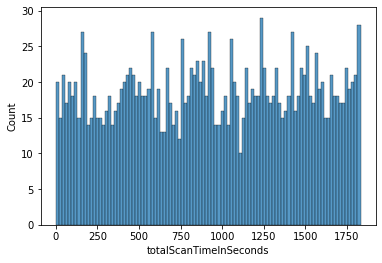

In [52]:
sns.histplot(df['totalScanTimeInSeconds'],bins=100)

C:\Users\vedant kathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='totalScanTimeInSeconds'>

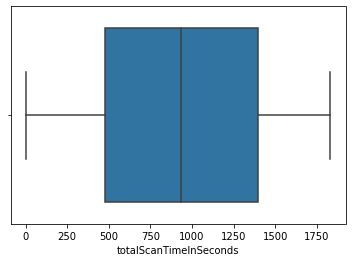

In [53]:
sns.boxplot(df['totalScanTimeInSeconds'])

<AxesSubplot:xlabel='grandTotal', ylabel='Count'>

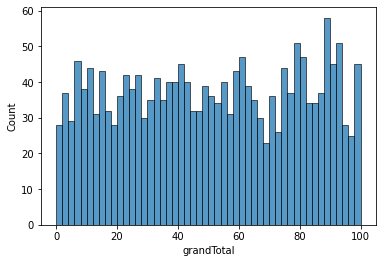

In [54]:
sns.histplot(df['grandTotal'],bins=50)

C:\Users\vedant kathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grandTotal'>

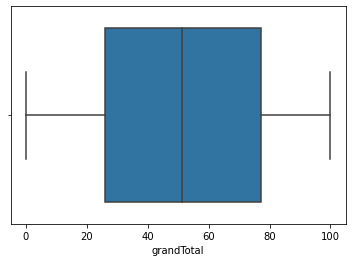

In [55]:
sns.boxplot(df['grandTotal'])

<AxesSubplot:xlabel='scannedLineItemsPerSecond', ylabel='Count'>

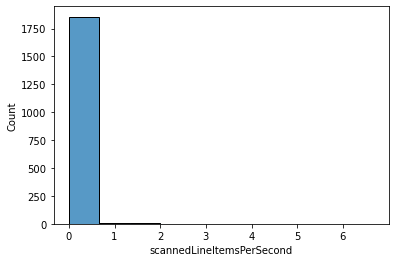

In [56]:
sns.histplot(df['scannedLineItemsPerSecond'],bins=10)

In [57]:
df.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,3.401809,932.153273,50.864492,5.469931,4.904204,2.525279,0.058138,0.201746,0.745404,0.055349
std,1.709404,530.144640,28.940202,3.451169,3.139697,1.695472,0.278512,1.242135,1.327241,0.228720
min,1.000000,2.000000,0.010000,0.000000,0.000000,0.000000,0.000548,0.000007,0.000000,0.000000
25%,2.000000,474.500000,25.965000,2.000000,2.000000,1.000000,0.008384,0.027787,0.160000,0.000000
50%,3.000000,932.000000,51.210000,5.000000,5.000000,3.000000,0.016317,0.054498,0.350000,0.000000
75%,5.000000,1397.000000,77.285000,8.000000,8.000000,4.000000,0.032594,0.107313,0.666667,0.000000
max,6.000000,1831.000000,99.960000,11.000000,10.000000,5.000000,6.666667,37.870000,11.000000,1.000000


C:\Users\vedant kathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='valuePerSecond'>

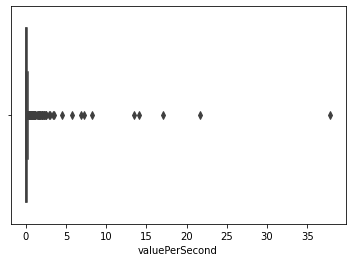

In [58]:
sns.boxplot(df['valuePerSecond'])

C:\Users\vedant kathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='scannedLineItemsPerSecond'>

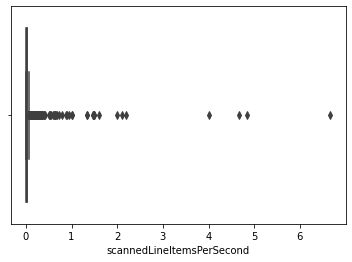

In [59]:
sns.boxplot(df['scannedLineItemsPerSecond'])

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rfc=RandomForestClassifier(n_estimators= 300,
 min_samples_split= 100,
 min_samples_leaf= 5,
 max_features= 'auto',
 max_depth= 15)
model_rfc=rfc.fit(X_train_sm,y_train_sm)
y_pred2 = model_rfc.predict(X_test)


<ipython-input-61-2231c9cfe51a>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rfc=rfc.fit(X_train_sm,y_train_sm)


In [62]:
print('Accuracy of RFC classifier on test set: {:.2f}'.format(model_rfc.score(X_test, y_test)))

Accuracy of RFC classifier on test set: 0.94


In [63]:
confusion_matrix4 = confusion_matrix(y_test, y_pred2)
print(confusion_matrix4)

[[452233  22161]
 [  7807  15920]]


In [64]:
ensembling['RFC']=y_pred2
ensembling.head()

,logistic_pred,ann,RFC
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn=KNeighborsClassifier()
model_knn=knn.fit(X_train_sm,y_train_sm)
y_pred3 = model_knn.predict(X_test)
print('Accuracy of knn classifier on test set: {:.2f}'.format(model_knn.score(X_test, y_test)))

C:\Users\vedant kathe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy of knn classifier on test set: 0.94


In [67]:
ensembling['knn']=y_pred3
ensembling.head()

,logistic_pred,ann,RFC,knn
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [68]:
ensembling['fraud']=y_pred

In [69]:
ensembling.head()

,logistic_pred,ann,RFC,knn,fraud
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [72]:
confusion_matrix5 = confusion_matrix(y_test, y_pred3)
print(confusion_matrix5)

[[458148  16246]
 [ 15603   8124]]


In [73]:
from sklearn.svm import SVC
svc=SVC(C=100, gamma=0.001, kernel='rbf')
svc_model=svc.fit(X_train_sm,y_train_sm)
y_pred4=svc_model.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svc_model.score(X_test, y_test)))

C:\Users\vedant kathe\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of SVM classifier on test set: 0.96


In [74]:
confusion_matrix6 = confusion_matrix(y_test, y_pred4)
print(confusion_matrix6)

[[463807  10587]
 [  9125  14602]]


In [148]:
from sklearn.ensemble import AdaBoostClassifier


In [154]:
adb=AdaBoostClassifier(n_estimators=1000)
model_adb=adb.fit(X_train_sm,y_train_sm)
y_pred10 = model_adb.predict(X_test)


C:\Users\vedant kathe\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [155]:
print('Accuracy of adb classifier on test set: {:.2f}'.format(model_adb.score(X_test, y_test)))

Accuracy of adb classifier on test set: 0.85


In [156]:
confusion_matrix00 = confusion_matrix(y_test, y_pred10)
print(confusion_matrix00)

[[400456  73938]
 [  1742  21985]]


In [77]:
ensembling['svc']=y_pred4
ensembling[500:550]

,logistic_pred,ann,RFC,knn,fraud,svc
500,0,0,0,0,0,0
501,0,0,0,0,0,0
502,0,0,0,0,0,0
503,0,0,0,0,0,0
504,0,0,0,0,0,0
505,0,0,0,0,0,0
506,0,0,0,0,0,0
507,0,0,0,0,0,0
508,0,0,0,0,0,0
509,0,1,0,0,0,0


In [104]:
ensembling=ensembling[["logistic_pred","ann","RFC","knn","svc","fraud"]]

In [125]:
ensembling[500:550]

,logistic_pred,ann,RFC,knn,svc,fraud
500,0,0,0,0,0,0
501,0,0,0,0,0,0
502,0,0,0,0,0,0
503,0,0,0,0,0,0
504,0,0,0,0,0,0
505,0,0,0,0,0,0
506,0,0,0,0,0,0
507,0,0,0,0,0,0
508,0,0,0,0,0,0
509,0,1,0,0,0,0


In [112]:
# zero_counter=0
# arr=[]
# naya_list=[]
# for row in range(len(y_pred)):
#     for column in range(5):
#         arr.append(ensembling.loc[row][column])
#     for i in arr:
#         if i==0:
#             zero_counter+=1
#     if zero_counter>=3:
#         naya_list.append(0)
#         zero_counter=0
#     else :
#         naya_list.append(1)
#         zero_counter=0
#     arr =[]
    

In [145]:
arr=[]
naya_list=[]
imp_list=[]
for row in range(len(y_pred)):
    for column in range(5):
        arr.append(ensembling.loc[row][column])
    imp_list.append(3*arr[0]+5*arr[1]+1*arr[2]+1*arr[3]+3*arr[4])    
    if imp_list[0]>=5:
        naya_list.append(1)
    else:
        naya_list.append(0)
    imp_list=[]
    arr=[]  

In [144]:
ensembling.head()

,logistic_pred,ann,RFC,knn,svc,fraud
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [146]:
ensembling['ensemble']=naya_list

In [143]:
ensembling.drop('ensemble',axis=1,inplace=True)

In [147]:
confusion_matrix8 = confusion_matrix(y_test,ensembling['ensemble'])
print(confusion_matrix8)

[[456631  17763]
 [  2714  21013]]


In [76]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
def get_model():
    classifier1 = keras.models.Sequential()
    classifier1.add(keras.layers.Dense(5, activation = 'relu', input_dim = 9))
    classifier1.add(keras.layers.Dense(5, activation = 'relu'))
    classifier1.add(keras.layers.Dense(5, kernel_initializer='ones',
                      kernel_regularizer=tf.keras.regularizers.l1(0.001),
                     activity_regularizer=tf.keras.regularizers.l2(0.00001)))
    classifier1.add(keras.layers.Dense(5, activation = 'relu'))
    classifier1.add(keras.layers.Dense(1, activation = 'sigmoid'))
    classifier1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return classifier1
#ann = keras.wrappers.scikit_learn.KerasClassifier(build_fn=get_model())
#ann._estimator_type = "classifier"

ann = KerasClassifier(build_fn=get_model, epochs=100)
ann._estimator_type = "classifier"
ann_pipe = Pipeline([('ann', ann)])

NameError: name 'Pipeline' is not defined

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
#SVC pipeline
svc = SVC(C=100, gamma=0.001, kernel='rbf')
svc_pipe = Pipeline(
    [('svc', svc)])
#RFC
rfc=RandomForestClassifier(n_estimators= 300,
 min_samples_split= 100,
 min_samples_leaf= 5,
 max_features= 'auto',
 max_depth= 15)
rfc_pipe=Pipeline([('rfc',rfc)])
#LR
lr=LogisticRegression()
lr_pipe=Pipeline([('lr',lr)])

In [ ]:
from sklearn.ensemble import VotingClassifier
clf1=VotingClassifier(estimators=[('ann',ann_pipe),('lr',lr_pipe),('svc',svc_pipe),('rfc',rfc_pipe)],weights=[2,1,1,1],voting='hard')
clf_mod=clf1.fit(X_train_sm,y_train_sm)
#y_pred5=clf_mod.predict(X_test)
#print('Accuracy of SVM classifier on test set: {:.2f}'.format(clf_mod.score(X_test, y_test)))

In [ ]:
clf_mod

In [ ]:
clf_mod.score(X_test, y_test)

In [ ]:
y_test

In [ ]:
confusion_matrix7 = confusion_matrix(y_test, y_pred5)
print(confusion_matrix7)